## Import Python Libraries and Import Dataset into Jupyter Notebook

In [1]:
import pandas as pd  #pandas does things with matrixes
import numpy as np #used for sorting a matrix
import matplotlib.pyplot as plt #matplotlib is used for plotting data
import matplotlib.ticker as ticker #used for changing tick spacing
import datetime as dt #used for dates
import matplotlib.dates as mdates #used for dates where datetime cannot be used
from fbprophet import Prophet #used to forecast for 2018

In [2]:
df = pd.read_csv(r"C:\Users\npasi\Downloads\Capstone_Two_Dataset_Cleaned.csv", encoding = "ISO-8859-1", engine='python',
                         header=0) #reads the raw data file from Excel for all companies & S&P 500 fund
df1 = pd.read_csv(r"C:\Users\npasi\Downloads\Capstone_Two_Ranked.csv", encoding = "ISO-8859-1", engine='python',
                         header=0) #reads the ranked file from Excel with total compay growth ranked from greatest to least)

data = pd.read_csv(r"C:\Users\npasi\Downloads\Capstone_Two_Example.csv") #reads the file from Excel.
# had to restructure file since it would not work with original settings of 'encoding', 'engine', 'header'

avgo_df = pd.read_csv("Downloads/Datasets/AVGO.csv") 

gspc_df = pd.read_csv("Downloads/Datasets/GSPC.csv") 

atvi_df = pd.read_csv("Downloads/Datasets/ATVI.csv") 

nflx_df = pd.read_csv("Downloads/Datasets/NFLX.csv") 

ea_df = pd.read_csv("Downloads/Datasets/EA.csv") 

algn_df = pd.read_csv("Downloads/Datasets/ALGN.csv") 

nvda_df = pd.read_csv("Downloads/Datasets/NVDA1.csv") 


C:\Users\npasi\anaconda3\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.columns #prints just the columns of the matrix
# df.dtypes

# df.describe()

# df.info()

Index(['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Company',
       'Sector', '$ Change Close from 2014-2017',
       '% Change Close from 2014-2017', '$10M Daily Growth Invested 2014-2017',
       'Total $Growth', 'Total %Growth'],
      dtype='object')

In [4]:
df=df.Ticker.unique() #pulls all unique names from column 'Symbol'
df=np.sort(df,kind='quicksort') #sorts them alphabetically
print(df) #displays the matrix of the names

['A' 'AAL' 'AAP' 'AAPL' 'ABBV' 'ABC' 'ABT' 'ACN' 'ADBE' 'ADI' 'ADM' 'ADP'
 'ADS' 'ADSK' 'AEE' 'AEP' 'AES' 'AET' 'AFL' 'AGN' 'AIG' 'AIV' 'AIZ' 'AJG'
 'AKAM' 'ALB' 'ALGN' 'ALK' 'ALL' 'ALLE' 'ALXN' 'AMAT' 'AMD' 'AME' 'AMG'
 'AMGN' 'AMP' 'AMT' 'AMZN' 'ANDV' 'ANSS' 'ANTM' 'AON' 'AOS' 'APA' 'APC'
 'APD' 'APH' 'APTV' 'ARE' 'ARNC' 'ATVI' 'AVB' 'AVGO' 'AVY' 'AWK' 'AXP'
 'AYI' 'AZO' 'BA' 'BAC' 'BAX' 'BBT' 'BBY' 'BDX' 'BEN' 'BF.B' 'BHF' 'BHGE'
 'BIIB' 'BK' 'BLK' 'BLL' 'BMY' 'BRK.B' 'BSX' 'BWA' 'BXP' 'C' 'CA' 'CAG'
 'CAH' 'CAT' 'CB' 'CBG' 'CBOE' 'CBS' 'CCI' 'CCL' 'CDNS' 'CELG' 'CERN' 'CF'
 'CFG' 'CHD' 'CHK' 'CHRW' 'CHTR' 'CI' 'CINF' 'CL' 'CLX' 'CMA' 'CMCSA'
 'CME' 'CMG' 'CMI' 'CMS' 'CNC' 'CNP' 'COF' 'COG' 'COL' 'COO' 'COP' 'COST'
 'COTY' 'CPB' 'CRM' 'CSCO' 'CSRA' 'CSX' 'CTAS' 'CTL' 'CTSH' 'CTXS' 'CVS'
 'CVX' 'CXO' 'D' 'DAL' 'DE' 'DFS' 'DG' 'DGX' 'DHI' 'DHR' 'DIS' 'DISCA'
 'DISCK' 'DISH' 'DLR' 'DLTR' 'DOV' 'DPS' 'DRE' 'DRI' 'DTE' 'DUK' 'DVA'
 'DVN' 'DWDP' 'DXC' 'EA' 'EBAY' 'ECL' 'ED' 'EFX' 'EIX' 'E

In [5]:
df1.head() #shows the top 5 companies ranked based on growth from 2014-2017 from percentage

,Ticker,$Growth,%Growth,Fraction of %
0,NVDA,1.120050e+08,1120.05,11.20
1,AVGO,3.879392e+07,387.94,3.88
2,EA,3.601840e+07,360.18,3.60
3,ALGN,2.900808e+07,290.08,2.90
4,NFLX,2.703546e+07,270.35,2.70


In [6]:
df1.tail() #shows the bottom 5 companies ranked based on growth from 2014-2017 from percentage

,Ticker,$Growth,%Growth,Fraction of %
501,UA,-6794995.19,-67.95,-0.68
502,DISCK,-7434561.32,-74.35,-0.74
503,DISCA,-7488215.49,-74.88,-0.75
504,RRC,-7912894.54,-79.13,-0.79
505,CHK,-8512396.69,-85.12,-0.85


# Data Cleansing
# There is no need to clean the data since the Close prices are all formatted with no missing values, but if I needed to I would do it this way for NaN for the cells that did not have numerical values in them

In [7]:
# df = df.drop(df.loc[df['Close'].isnull()].index) #drops rows with a null cell in the Close column

In [8]:
# total = df.isnull().sum().sort_values(ascending=False) # counts all null cells in a row
# percent = ((df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100) # sees what percent of the data is null
# missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent']) # combines the two matrixies for missing data
# missing_data # this displays the matrix if I needed to view it

# Which companies outperform S&P 500 ROI by 10% from 2014-2017? 
# ROI=45.94%; Target ROI= 55.94%

In [9]:
invest = df1.loc[df1['%Growth'] > 55.94, ['Ticker']]

In [10]:
pd.set_option('display.max_rows', None)
print(invest)

    Ticker
0     NVDA
1     AVGO
2       EA
3     ALGN
4     NFLX
5     ATVI
6      LUV
7     SWKS
8       EW
9      CNC
10    LRCX
11     STZ
12      FB
13     GPN
14    CDNS
15    IDXX
16     UNH
17    ADBE
18    AMZN
19    AMAT
20    ISRG
21    MNST
22     MAR
23     NOC
24     HII
25     AET
26    CTAS
27     AMD
28    EQIX
29     MTD
30     RCL
31    ETFC
32    CHTR
33    ANTM
34     TSN
35    CBOE
36     TXN
37     HUM
38     TSS
39      CI
40     DHI
41    ULTA
42     AVY
43      HD
44     DLR
45    MSFT
46     AOS
47    FISV
48     SHW
49     URI
50     ZTS
51     MLM
52     AWK
53     LMT
54     VMC
55    SPGI
56    ROST
57      BA
58     RHT
59      GD
60    AAPL
61     IQV
62    ADSK
63     SWK
64     RTN
65    SNPS
66     PGR
67     EXR
68     BSX
69    INTU
70     SYK
71     HRS
72       V
73     AAL
74     RSG
75     ARE
76     DPS
77    VRTX
78     ALB
79     DAL
80     ALK
81     ITW
82    PYPL
83     APH
84     XYL
85    MCHP
86    SCHW
87    ILMN
88    ANDV
89     BDX

# Which companies do not perform better than 10% of the S&P 500 fund ROI but better than S&P 500 fund from 2014-2017? ROI=45.94%; Target ROI= 55.94%

In [11]:
no_invest_now = df1["%Growth"].between(45.94, 55.94, inclusive=True)

In [12]:
print(df1[no_invest_now])

    Ticker     $Growth  %Growth  Fraction of %
211    TXT  5593827.50    55.94           0.56
212     BK  5584490.74    55.84           0.56
213  CMCSA  5568513.12    55.69           0.56
214    LEG  5567514.68    55.68           0.56
215    CCI  5497696.50    54.98           0.55
216    AIZ  5437844.46    54.38           0.54
217   CHRW  5408163.27    54.08           0.54
218   NCLH  5372401.85    53.72           0.54
219    JNJ  5348786.11    53.49           0.53
220    CHD  5319083.97    53.19           0.53
221      O  5266398.93    52.66           0.53
222   HBAN  5262054.51    52.62           0.53
223    LNC  5212744.90    52.13           0.52
224     DG  5197712.42    51.98           0.52
225    TRV  5184148.66    51.84           0.52
226    KEY  5176824.68    51.77           0.52
227   PCLN  5170938.68    51.71           0.52
228     ES  5143815.92    51.44           0.51
229   PAYX  5108743.90    51.09           0.51
230    AVB  5088802.44    50.89           0.51
231   FBHS  5

# Which companies do not perform better than the S&P 500 fund ROI from 2014-2017? ROI=45.94%; 

In [13]:
no_invest = df1.loc[df1['%Growth'] < 45.94, ['Ticker']]

In [14]:
pd.set_option('display.max_rows', None)
print(no_invest)

    Ticker
255   CINF
256    CXO
257     IR
258   FITB
259    PFG
260    EXC
261     GS
262    VAR
263   CTSH
264     CB
265      C
266    MDT
267    DIS
268   CTXS
269    MGM
270    UHS
271    PSA
272    LYB
273   AKAM
274     KR
275    DXC
276    EIX
277    AME
278    DFS
279    HLT
280     GT
281   XRAY
282    AJG
283   REGN
284   NTAP
285    KMX
286    MSI
287    BBT
288    WFC
289    USB
290    RHI
291    STT
292    TWX
293    AFL
294   GRMN
295    PSX
296    FRT
297    ETR
298    ABC
299    ZBH
300    EOG
301    BXP
302    NFX
303    ECL
304    COF
305    WBA
306    IRM
307   COTY
308      D
309    CMI
310   TROW
311    FMC
312   JNPR
313    PRU
314    LKQ
315    WMT
316    PWR
317   ORCL
318   PBCT
319    CNP
320    PPG
321    DUK
322   HSIC
323   MDLZ
324     PM
325    EQR
326   CERN
327    SJM
328   PCAR
329    DHR
330   CELG
331    XEC
332    SRE
333    NUE
334    TJX
335    HBI
336    GIS
337   WLTW
338   SYMC
339     PX
340      A
341    HCN
342    PFE
343     IP
344    VFC

# Insight

# There are 211 companies that meet the threshold of our target ROI performance from 2014-2017 of 55.94%. We shall focus on the top 5 companies [NVDA, AVGO, EA, ALGN, NFLX] to graph their daily ROI for 2014-2017 then forecast for 2018 and compare with S&P 500 fund

In [15]:
data.columns #checking the columns

Index(['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Don't Use',
       '$Change', '%Change'],
      dtype='object')

In [16]:
data.head() #checking first 5 rows of data

,Ticker,Date,Open,High,Low,Close,Volume,Don't Use,$Change,%Change
0,A,1/2/2014,57.10,57.10,56.15,56.21,1916160.0,0.00,0.00,0.00
1,A,1/3/2014,56.39,57.35,56.26,56.92,1866651.0,0.01,126312.04,1.26
2,A,1/6/2014,57.40,57.70,56.56,56.64,1777472.0,0.01,76498.84,0.76
3,A,1/7/2014,56.95,57.63,56.93,57.45,1463208.0,0.02,220601.32,2.21
4,A,1/8/2014,57.33,58.54,57.17,58.39,2659468.0,0.04,387831.35,3.88


In [17]:
data['Date'] = pd.to_datetime(data['Date']) #converting date into proper datatype for manipulation in Python
data = data.set_index('Date') #setting date as index
data.head() #checking data again to make sure 'Date' has been set as index

,Ticker,Open,High,Low,Close,Volume,Don't Use,$Change,%Change
Date,,,,,,,,,
2014-01-02,A,57.10,57.10,56.15,56.21,1916160.0,0.00,0.00,0.00
2014-01-03,A,56.39,57.35,56.26,56.92,1866651.0,0.01,126312.04,1.26
2014-01-06,A,57.40,57.70,56.56,56.64,1777472.0,0.01,76498.84,0.76
2014-01-07,A,56.95,57.63,56.93,57.45,1463208.0,0.02,220601.32,2.21
2014-01-08,A,57.33,58.54,57.17,58.39,2659468.0,0.04,387831.35,3.88


In [18]:
stocknames=data.Ticker.unique() #pulling all unique stocks from data to make sure it has stocks we want to use [
# AVGO, ATVI, ALGN, NVDA, EA, NFLX, GSPC
stocknames = np.sort(stocknames) #sorting stocks in alphabetical order
print(stocknames) #checking dataframe

['A' 'AAL' 'AAP' 'AAPL' 'ABBV' 'ABC' 'ABT' 'ACN' 'ADBE' 'ADI' 'ADM' 'ADP'
 'ADS' 'ADSK' 'AEE' 'AEP' 'AES' 'AET' 'AFL' 'AGN' 'AIG' 'AIV' 'AIZ' 'AJG'
 'AKAM' 'ALB' 'ALGN' 'ALK' 'ALL' 'ALLE' 'ALXN' 'AMAT' 'AMD' 'AME' 'AMG'
 'AMGN' 'AMP' 'AMT' 'AMZN' 'ANDV' 'ANSS' 'ANTM' 'AON' 'AOS' 'APA' 'APC'
 'APD' 'APH' 'APTV' 'ARE' 'ARNC' 'ATVI' 'AVB' 'AVGO' 'AVY' 'AWK' 'AXP'
 'AYI' 'AZO' 'BA' 'BAC' 'BAX' 'BBT' 'BBY' 'BDX' 'BEN' 'BF.B' 'BHF' 'BHGE'
 'BIIB' 'BK' 'BLK' 'BLL' 'BMY' 'BRK.B' 'BSX' 'BWA' 'BXP' 'C' 'CA' 'CAG'
 'CAH' 'CAT' 'CB' 'CBG' 'CBOE' 'CBS' 'CCI' 'CCL' 'CDNS' 'CELG' 'CERN' 'CF'
 'CFG' 'CHD' 'CHK' 'CHRW' 'CHTR' 'CI' 'CINF' 'CL' 'CLX' 'CMA' 'CMCSA'
 'CME' 'CMG' 'CMI' 'CMS' 'CNC' 'CNP' 'COF' 'COG' 'COL' 'COO' 'COP' 'COST'
 'COTY' 'CPB' 'CRM' 'CSCO' 'CSRA' 'CSX' 'CTAS' 'CTL' 'CTSH' 'CTXS' 'CVS'
 'CVX' 'CXO' 'D' 'DAL' 'DE' 'DFS' 'DG' 'DGX' 'DHI' 'DHR' 'DIS' 'DISCA'
 'DISCK' 'DISH' 'DLR' 'DLTR' 'DOV' 'DPS' 'DRE' 'DRI' 'DTE' 'DUK' 'DVA'
 'DVN' 'DWDP' 'DXC' 'EA' 'EBAY' 'ECL' 'ED' 'EFX' 'EIX' 'E

In [19]:
nvda = data[data['Ticker'] == 'NVDA'] #extracting NVDA stock
avgo = data[data['Ticker'] == 'AVGO'] #extracting AVGO stock
ea = data[data['Ticker'] == 'EA'] #extracting EA stock
algn = data[data['Ticker'] == 'ALGN'] #extracting ALGN stock
nflx = data[data['Ticker'] == 'NFLX'] #extracting NFLX stock
gspc = data[data['Ticker'] == 'GSPC'] #extracting GSPC stock
atvi = data[data['Ticker'] == 'ATVI'] #extracting ATVI stock

In [20]:
nvda.describe() #checking the stock data to make sure there are stock closing prices for 1007 business days of 2014-2017
# and are still trading at the end of 2017

,Open,Close,Volume,Don't Use,$Change,%Change
count,1007.000000,1007.000000,1.007000e+03,1007.000000,1.007000e+03,1007.000000
mean,61.339355,61.364886,1.076129e+07,2.869156,2.869146e+07,286.914727
std,57.176812,57.118126,7.656879e+06,3.601467,3.601405e+07,360.140458
min,15.430000,15.360000,1.141128e+06,-0.030000,-3.152585e+05,-3.150000
25%,19.990000,20.015000,6.249914e+06,0.260000,2.619798e+06,26.200000
50%,30.880000,31.030000,8.547710e+06,0.960000,9.564943e+06,95.650000
75%,98.610000,98.870000,1.228829e+07,5.235000,5.233922e+07,523.390000
max,217.310000,216.960000,9.232320e+07,12.680000,1.267970e+08,1267.970000


In [21]:
avgo.describe() #checking the stock data to make sure there are stock closing prices for 1007 business days of 2014-2017
# and are still trading at the end of 2017

,Open,Close,Volume,Don't Use,$Change,%Change
count,1007.000000,1007.000000,1.007000e+03,1007.000000,1.007000e+03,1007.000000
mean,148.064538,148.079166,2.889738e+06,1.812433,1.812518e+07,181.251787
std,61.451668,61.389404,2.541995e+06,1.165955,1.165991e+07,116.599060
min,52.450000,52.490000,5.761690e+05,0.000000,-3.038936e+04,-0.300000
25%,101.095000,101.365000,1.780968e+06,0.925000,9.252612e+06,92.525000
50%,138.950000,138.630000,2.354180e+06,1.630000,1.633048e+07,163.300000
75%,179.590000,179.655000,3.249086e+06,2.415000,2.412251e+07,241.225000
max,284.860000,284.620000,5.602799e+07,4.410000,4.405888e+07,440.590000


In [22]:
ea.describe() #checking the stock data to make sure there are stock closing prices for 1007 business days of 2014-2017
# and are still trading at the end of 2017

,Open,Close,Volume,Don't Use,$Change,%Change
count,1007.000000,1007.000000,1.007000e+03,1007.000000,1.007000e+03,1007.000000
mean,68.909017,68.958808,3.551909e+06,2.020457,2.020525e+07,202.052502
std,26.461639,26.430741,2.155053e+06,1.157799,1.157726e+07,115.772451
min,21.860000,21.540000,7.808450e+05,-0.060000,-5.650460e+05,-5.650000
25%,47.345000,47.150000,2.282240e+06,1.065000,1.065265e+07,106.525000
50%,68.860000,68.720000,3.031630e+06,2.010000,2.010074e+07,201.010000
75%,82.920000,82.880000,4.124652e+06,2.630000,2.630311e+07,263.030000
max,122.000000,121.970000,2.484001e+07,4.340000,4.342532e+07,434.250000


In [23]:
algn.describe() #checking the stock data to make sure there are stock closing prices for 1007 business days of 2014-2017
# and are still trading at the end of 2017

,Open,Close,Volume,Don't Use,$Change,%Change
count,1007.000000,1007.000000,1.007000e+03,1007.000000,1.007000e+03,1007.000000
mean,88.490179,88.490983,8.819067e+05,0.553515,5.535620e+06,55.356256
std,49.019506,48.993203,8.658601e+05,0.860177,8.601346e+06,86.013383
min,43.680000,44.370000,1.412320e+05,-0.220000,-2.210323e+06,-22.100000
25%,56.125000,56.025000,5.610100e+05,-0.020000,-1.641503e+05,-1.645000
50%,65.690000,65.590000,7.262350e+05,0.150000,1.515098e+06,15.150000
75%,95.990000,96.000000,9.911085e+05,0.690000,6.853933e+06,68.540000
max,264.400000,264.230000,1.794026e+07,3.640000,3.638869e+07,363.890000


In [24]:
nflx.describe() #checking the stock data to make sure there are stock closing prices for 1007 business days of 2014-2017
# and are still trading at the end of 2017

,Open,Close,Volume,Don't Use,$Change,%Change
count,1007.000000,1007.000000,1.007000e+03,1007.000000,1.007000e+03,1007.000000
mean,104.118560,104.138073,1.437372e+07,1.009235,1.009170e+07,100.916922
std,42.564779,42.545116,1.104673e+07,0.820765,8.208367e+06,82.083585
min,44.610000,44.890000,1.616260e+06,-0.130000,-1.339786e+06,-13.400000
25%,64.440000,64.320000,7.073180e+06,0.240000,2.409591e+06,24.095000
50%,97.310000,97.450000,1.157139e+07,0.880000,8.801344e+06,88.010000
75%,128.385000,128.640000,1.792383e+07,1.485000,1.481893e+07,148.190000
max,201.950000,202.680000,1.045007e+08,2.910000,2.910371e+07,291.040000


In [25]:
gspc.describe() #checking the stock data to make sure there are stock closing prices for 1007 business days of 2014-2017
# and are still trading at the end of 2017

,Open,Close,Volume,Don't Use,$Change,%Change
count,1007.000000,1007.000000,1.007000e+03,1007.000000,1.007000e+03,1007.000000
mean,2133.284995,2133.730030,3.582155e+09,0.164657,1.647125e+06,16.471450
std,211.124742,211.321285,6.948154e+08,0.115384,1.153513e+06,11.535084
min,1743.820000,1741.890000,1.349780e+09,-0.050000,-4.917628e+05,-4.920000
25%,1985.320000,1986.480000,3.167625e+09,0.080000,8.433498e+05,8.435000
50%,2087.630000,2088.000000,3.487850e+09,0.140000,1.397504e+06,13.980000
75%,2267.295000,2265.190000,3.894610e+09,0.240000,2.364709e+06,23.650000
max,2692.710000,2690.160000,7.597450e+09,0.470000,4.684439e+06,46.840000


In [26]:
atvi.describe() #checking the stock data to make sure there are stock closing prices for 1007 business days of 2014-2017
# and are still trading at the end of 2017

,Open,Close,Volume,Don't Use,$Change,%Change
count,1007.000000,1007.000000,1.007000e+03,1007.000000,1.007000e+03,1007.000000
mean,35.573803,35.580308,7.644871e+06,0.968818,9.690174e+06,96.901579
std,14.506958,14.507089,6.152834e+06,0.802789,8.028350e+06,80.283529
min,16.630000,16.670000,1.369310e+06,-0.080000,-7.747648e+05,-7.750000
25%,22.720000,22.745000,4.948492e+06,0.260000,2.587161e+06,25.870000
50%,33.920000,34.050000,6.435446e+06,0.880000,8.843387e+06,88.430000
75%,43.625000,43.595000,8.596942e+06,1.415000,1.412562e+07,141.260000
max,67.080000,66.730000,1.330824e+08,2.690000,2.692861e+07,269.290000


# Insight

# All of the top stocks traded for the entire period from 2014-2017. We will now graph their closing price history to see if there are any noticeable trends between them and S&P 500 fund.

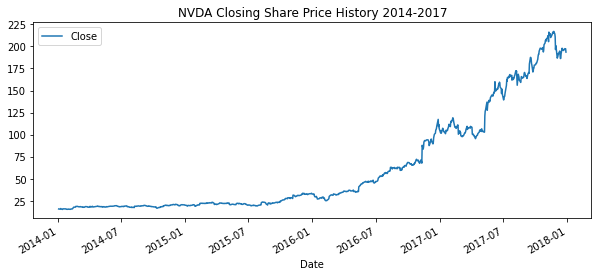

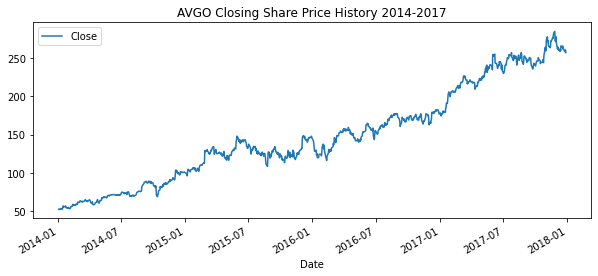

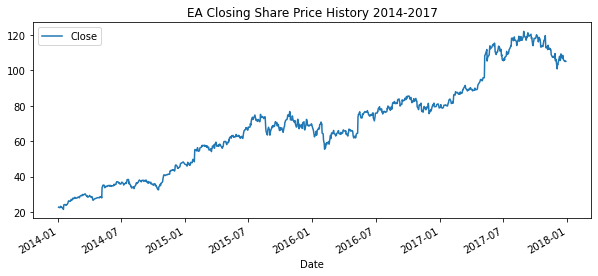

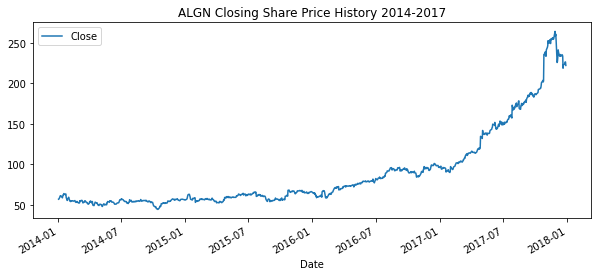

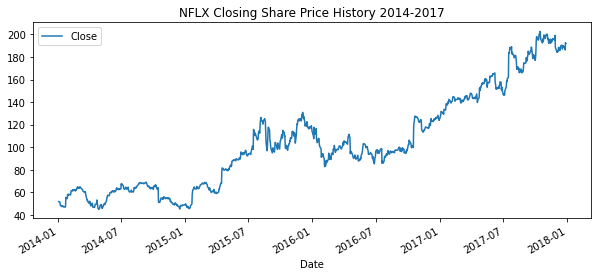

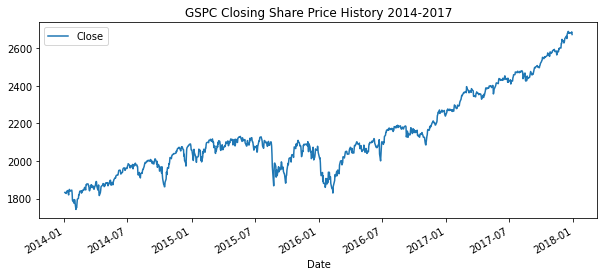

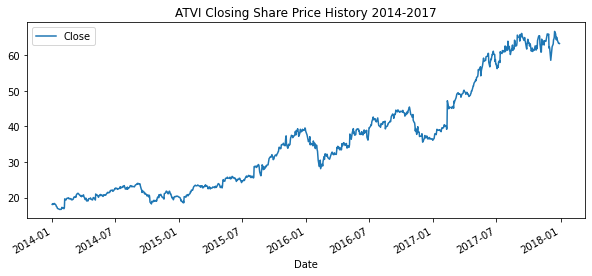

In [27]:
nvda.plot(y='Close',legend=True, title='NVDA Closing Share Price History 2014-2017', figsize=(10,4))
#visualising the close rates for all stocks
avgo.plot(y='Close',legend=True, title='AVGO Closing Share Price History 2014-2017', figsize=(10,4))
ea.plot(y='Close',legend=True, title='EA Closing Share Price History 2014-2017', figsize=(10,4))
algn.plot(y='Close',legend=True, title='ALGN Closing Share Price History 2014-2017', figsize=(10,4))
nflx.plot(y='Close',legend=True, title='NFLX Closing Share Price History 2014-2017', figsize=(10,4))
gspc.plot(y='Close',legend=True, title='GSPC Closing Share Price History 2014-2017', figsize=(10,4))
atvi.plot(y='Close',legend=True, title='ATVI Closing Share Price History 2014-2017', figsize=(10,4))
plt.ioff()

# Insight

# It can be seen that all stocks gained value over this time period but it is difficult to compare & contrast with yaxis values that are different. Now it is time to graph their percentage growth to see how well each stock improved since 2014.

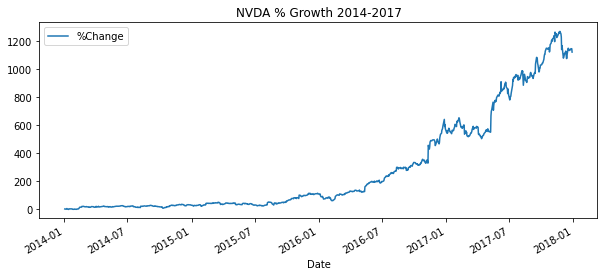

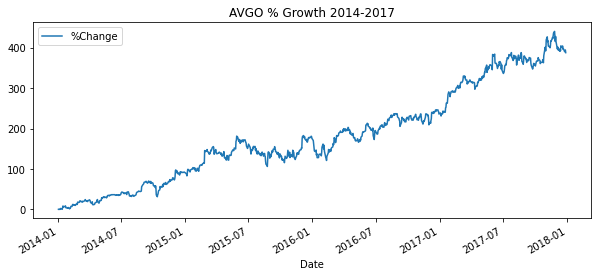

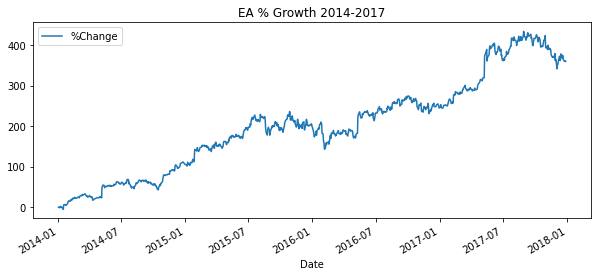

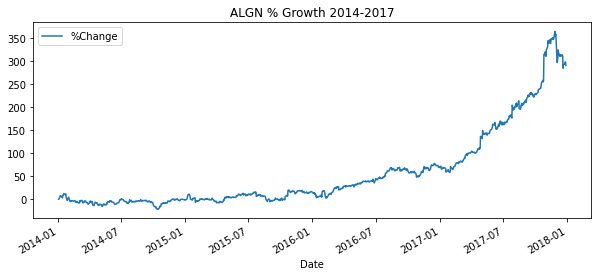

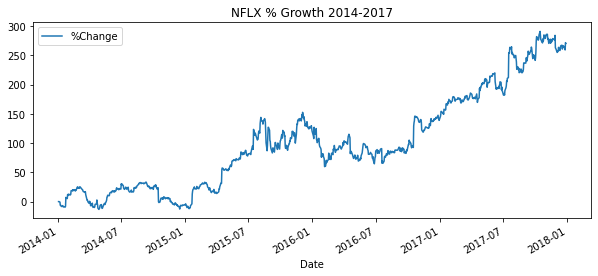

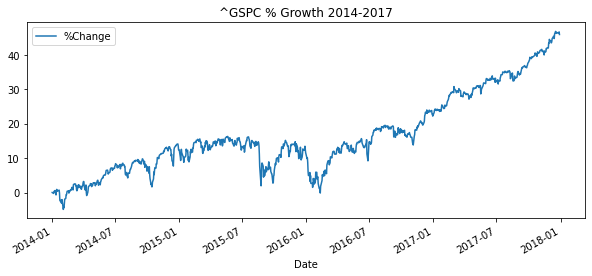

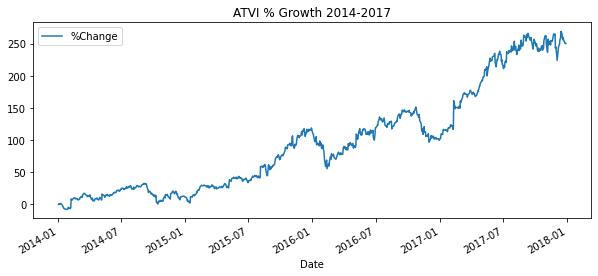

In [28]:
nvda.plot(y='%Change',legend=True, title='NVDA % Growth 2014-2017', figsize=(10,4)) 
#visualising the % change for all stocks
avgo.plot(y='%Change',legend=True, title='AVGO % Growth 2014-2017', figsize=(10,4))
ea.plot(y='%Change',legend=True, title='EA % Growth 2014-2017', figsize=(10,4))
algn.plot(y='%Change',legend=True, title='ALGN % Growth 2014-2017', figsize=(10,4))
nflx.plot(y='%Change',legend=True, title='NFLX % Growth 2014-2017', figsize=(10,4))
gspc.plot(y='%Change',legend=True, title='^GSPC % Growth 2014-2017', figsize=(10,4))
atvi.plot(y='%Change',legend=True, title='ATVI % Growth 2014-2017', figsize=(10,4))
plt.ioff()

# Insight

# After reviewing the top five stocks, it is seen that NVDA has grown over 1300% in value where the other stocks do not eclipse 400%. NVDA is an extreme outlier and we will use a different company to use for the top five with ATVI in place of NVDA.

# It is time to do box plot analysis for these stocks. It will help to show if their end value is outside of their IQR range & give more information if the stock values hold the gains that they have achieved.

<AxesSubplot:title={'center':'^GSPC'}>

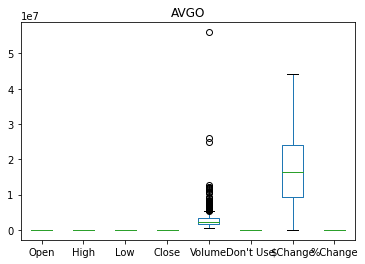

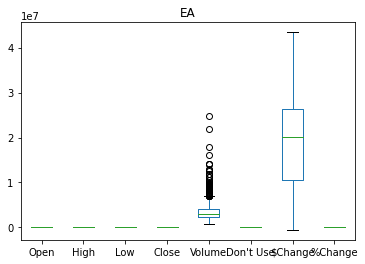

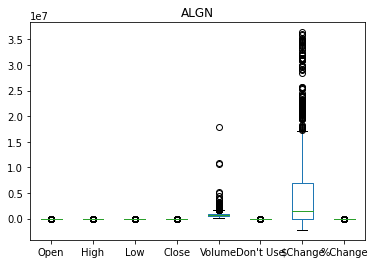

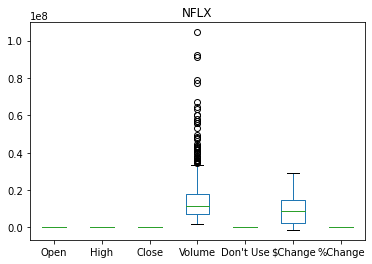

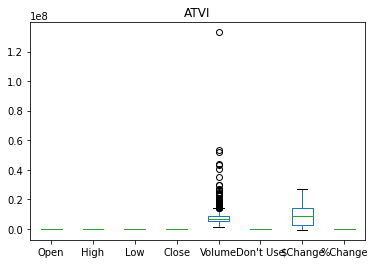

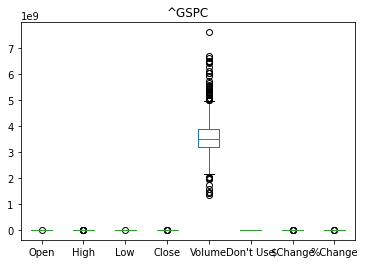

In [29]:
avgo.plot(kind='box', title='AVGO')
ea.plot(kind='box', title='EA')
algn.plot(kind='box', title='ALGN')
nflx.plot(kind='box', title='NFLX')
atvi.plot(kind='box', title='ATVI')
gspc.plot(kind='box', title='^GSPC')

# It is difficult to compare box plot values with all the other variables from the data. We will focus in on the column showing the growth of initial $10M stock in 2014 to see its range so that we can compare all stocks equally with the same investment.

In [30]:
avgo_dollars_growth = avgo['$Change']
ea_dollars_growth = ea['$Change']
algn_dollars_growth = algn['$Change']
nflx_dollars_growth = nflx['$Change']
atvi_dollars_growth = atvi['$Change']
gspc_dollars_growth = gspc['$Change']
nvda_dollars_growth = nvda['$Change']

<AxesSubplot:title={'center':'AVGO $ Range'}>

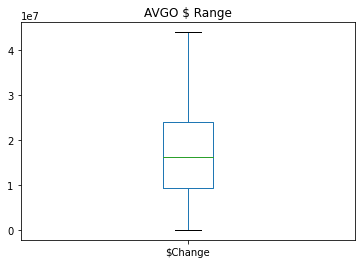

In [31]:
avgo_dollars_growth.plot(kind='box', title='AVGO $ Range') # y axis values are multipled by $10M

<AxesSubplot:title={'center':'EA $ Range'}>

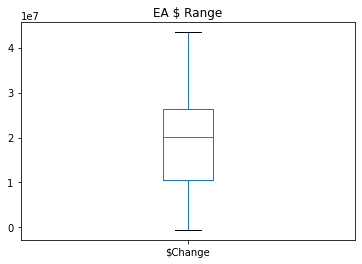

In [32]:
ea_dollars_growth.plot(kind='box', title='EA $ Range') # y axis values are multipled by $10M

<AxesSubplot:title={'center':'ALGN $ Range'}>

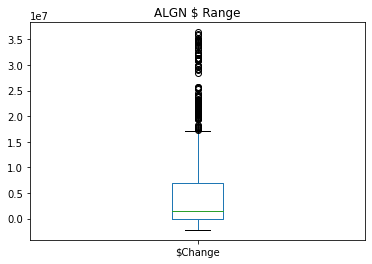

In [33]:
algn_dollars_growth.plot(kind='box', title='ALGN $ Range') # y axis values are multipled by $10M

<AxesSubplot:title={'center':'NFLX $ Range'}>

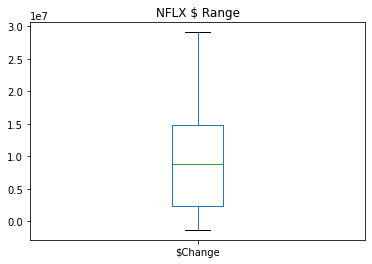

In [34]:
nflx_dollars_growth.plot(kind='box', title='NFLX $ Range') # y axis values are multipled by $10M

<AxesSubplot:title={'center':'ATVI $ Range'}>

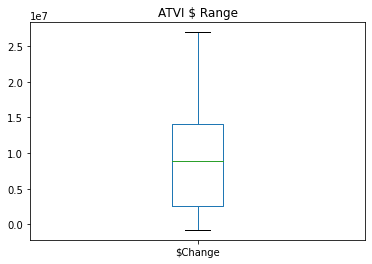

In [35]:
 atvi_dollars_growth.plot(kind='box', title='ATVI $ Range') # y axis values are multipled by $10M

<AxesSubplot:title={'center':'GSPC $ Range'}>

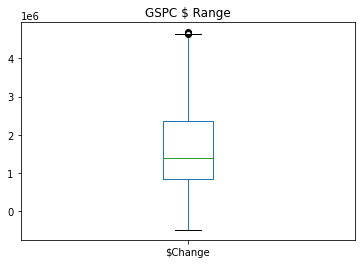

In [36]:
gspc_dollars_growth.plot(kind='box', title='GSPC $ Range') # y axis values are multipled by $1M

<AxesSubplot:title={'center':'NVDA $ Range'}>

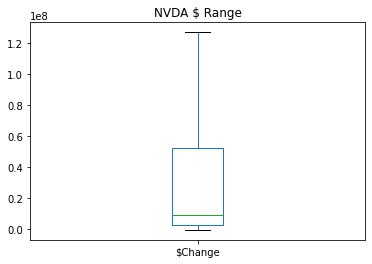

In [37]:
nvda_dollars_growth.plot(kind='box', title='NVDA $ Range') # y axis values are multipled by $10M

# Insight

# After plotting the 'Close' ranges for all 5 companies & S&P 500, we see that ALGN has a lot of outliers to their data because of their recent price surge in the second half of 2017. It can be seen that ALGN is losing value from the initial investment of 10M dollars but may continue to fall.

<AxesSubplot:title={'center':'ALGN $ Range'}, xlabel='Date'>

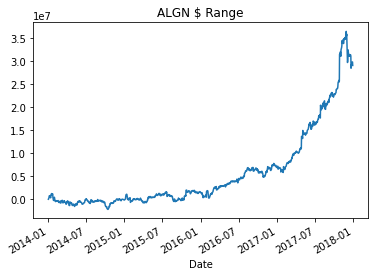

In [38]:
algn_dollars_growth.plot(kind='line', title='ALGN $ Range') # y axis values are multipled by $10M

<AxesSubplot:title={'center':'^GSPC $ Range'}, xlabel='Date'>

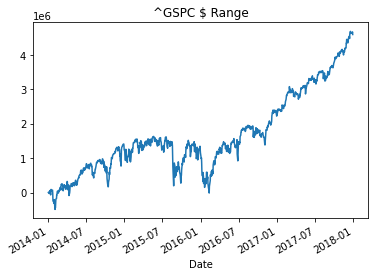

In [39]:
gspc_dollars_growth.plot(kind='line', title='^GSPC $ Range') # y axis values are multipled by $10M

<AxesSubplot:title={'center':'EA $ Range'}, xlabel='Date'>

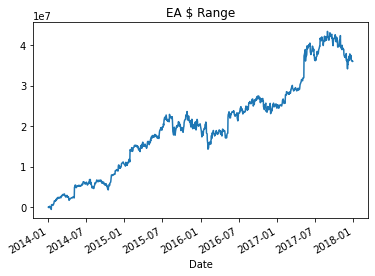

In [40]:
ea_dollars_growth.plot(kind='line', title='EA $ Range') # y axis values are multipled by $10M

Text(0.5, 1.0, 'E=EA,A=ALGN,N=NFLX,T=ATVI,V=AVGO,D=NVDA,C=GSPC')

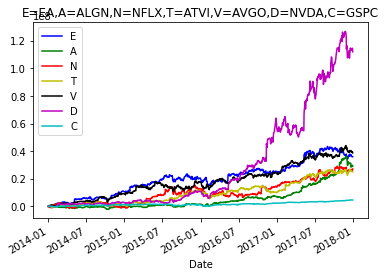

In [41]:
ea_dollars_growth.plot(kind='line', color='b') #Blue is EA
algn_dollars_growth.plot(kind='line', color='g') #Green is ALGN
nflx_dollars_growth.plot(kind='line', color='r') #Red is NFLX
atvi_dollars_growth.plot(kind='line', color='y') #Yellow is ATVI
avgo_dollars_growth.plot(kind='line', color='k') #Black is AVGO
nvda_dollars_growth.plot(kind='line', color='m') #Magenta is NVDA
gspc_dollars_growth.plot(kind='line', color='c') #Cyan is ^GSPC
plt.legend("EANTVDC")
plt.title("E=EA,A=ALGN,N=NFLX,T=ATVI,V=AVGO,D=NVDA,C=GSPC")

Text(0.5, 1.0, 'E=EA,A=ALGN,N=NFLX,T=ATVI,V=AVGO,G=GSPC')

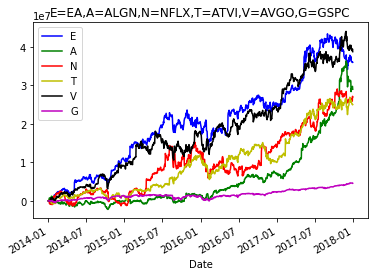

In [42]:
ea_dollars_growth.plot(kind='line', color='b') #Blue is EA
algn_dollars_growth.plot(kind='line', color='g') #Green is ALGN
nflx_dollars_growth.plot(kind='line', color='r') #Red is NFLX
atvi_dollars_growth.plot(kind='line', color='y') #Yellow is ATVI
avgo_dollars_growth.plot(kind='line', color='k') #Black is AVGO
gspc_dollars_growth.plot(kind='line', color='m') #Magenta is ^GSPC
plt.legend("EANTVG")
plt.title("E=EA,A=ALGN,N=NFLX,T=ATVI,V=AVGO,G=GSPC")

# From the chart above, it can be seen there is a wide gap between the top 5 stocks and the S&P 500 fund. But what about for the year 2018? Pick one stock to forecast for 2018 and compare it with the forecast of 2018 for the S&P 500 fund. Pick AVGO versus GSPC since AVGO showed it's high is within its IQR on the boxplot (as opposed to ALGN) and had the highest growth of all the stocks.

In [43]:
# Select only the important features i.e. the date and price
avgo_df = avgo_df[["Date","$Growth"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
avgo_df = avgo_df.rename(columns = {"Date":"ds","$Growth":"y"}) #renaming the columns of the dataset
avgo_df.head(5)

# ds is the date and y is the stock price for AVGO

,ds,y
0,1/2/2014,0.000000
1,1/3/2014,379.859435
2,1/6/2014,-30389.362570
3,1/7/2014,64577.395460
4,1/8/2014,214624.303300


In [44]:
# Select only the important features i.e. the date and price
gspc_df = gspc_df[["Date","$Growth"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
gspc_df = gspc_df.rename(columns = {"Date":"ds","$Growth":"y"}) #renaming the columns of the dataset
gspc_df.head(5)

# ds is the date and y is the stock price for ^GSPC

,ds,y
0,1/2/2014,0.000000
1,1/3/2014,-33.296488
2,1/6/2014,-28438.957070
3,1/7/2014,32205.728580
4,1/8/2014,30076.802480


In [45]:
# Select only the important features i.e. the date and price
nvda_df = nvda_df[["Date","$Growth"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
nvda_df = nvda_df.rename(columns = {"Date":"ds","$Growth":"y"}) #renaming the columns of the dataset
nvda_df.head(5)

# ds is the date and y is the stock price for ^GSPC

,ds,y
0,1/2/2014,0.00000
1,1/3/2014,-119798.23460
2,1/6/2014,12610.34048
3,1/7/2014,176544.13620
4,1/8/2014,315259.14250


In [46]:
# Select only the important features i.e. the date and price
ea_df = ea_df[["Date","$Growth"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
ea_df = ea_df.rename(columns = {"Date":"ds","$Growth":"y"}) #renaming the columns of the dataset
ea_df.head(5)

# ds is the date and y is the stock price for ^GSPC

,ds,y
0,1/2/2014,0.000000
1,1/3/2014,-657.030223
2,1/6/2014,-131405.606700
3,1/7/2014,118265.440200
4,1/8/2014,210249.233500


In [47]:
# Select only the important features i.e. the date and price
algn_df = algn_df[["Date","$Growth"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
algn_df = algn_df.rename(columns = {"Date":"ds","$Growth":"y"}) #renaming the columns of the dataset
algn_df.head(5)

# ds is the date and y is the stock price for ^GSPC

,ds,y
0,1/2/2014,0.000000
1,1/3/2014,368.678026
2,1/6/2014,516152.221100
3,1/7/2014,772472.274800
4,1/8/2014,661868.164700


In [48]:
# Select only the important features i.e. the date and price
atvi_df = atvi_df[["Date","$Growth"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
atvi_df = atvi_df.rename(columns = {"Date":"ds","$Growth":"y"}) #renaming the columns of the dataset
atvi_df.head(5)

# ds is the date and y is the stock price for ^GSPC

,ds,y
0,1/2/2014,0.000000
1,1/3/2014,1217.493082
2,1/6/2014,5534.034311
3,1/7/2014,138350.857800
4,1/8/2014,149418.926400


In [49]:
# Select only the important features i.e. the date and price
nflx_df = nflx_df[["Date","$Growth"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
nflx_df = nflx_df.rename(columns = {"Date":"ds","$Growth":"y"}) #renaming the columns of the dataset
nflx_df.head(5)

# ds is the date and y is the stock price for ^GSPC

,ds,y
0,1/2/2014,0.000000
1,1/3/2014,77.173253
2,1/6/2014,-89576.345660
3,1/7/2014,-642743.035300
4,1/8/2014,-601676.060300


In [50]:
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(avgo_df) # fit the model using all data

In [51]:
n = Prophet(daily_seasonality = True) # the Prophet class (model)
n.fit(gspc_df) # fit the model using all data

In [52]:
o = Prophet(daily_seasonality = True) # the Prophet class (model)
o.fit(nvda_df) # fit the model using all data

In [53]:
p = Prophet(daily_seasonality = True) # the Prophet class (model)
p.fit(ea_df) # fit the model using all data

In [54]:
q = Prophet(daily_seasonality = True) # the Prophet class (model)
q.fit(algn_df) # fit the model using all data

In [55]:
r = Prophet(daily_seasonality = True) # the Prophet class (model)
r.fit(atvi_df) # fit the model using all data

In [56]:
s = Prophet(daily_seasonality = True) # the Prophet class (model)
s.fit(nflx_df) # fit the model using all data

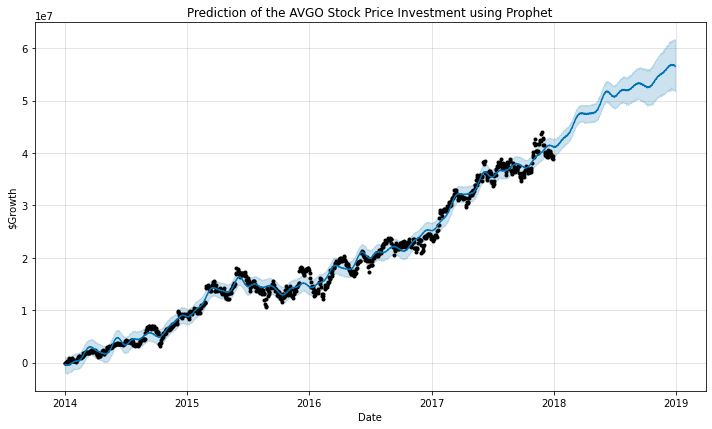

In [57]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the AVGO Stock Price Investment using Prophet")
plt.xlabel("Date")
plt.ylabel("$Growth")
plt.show()
# y axis is measured in $10. 1 = $10M, 2=$20M..., 6=$60M

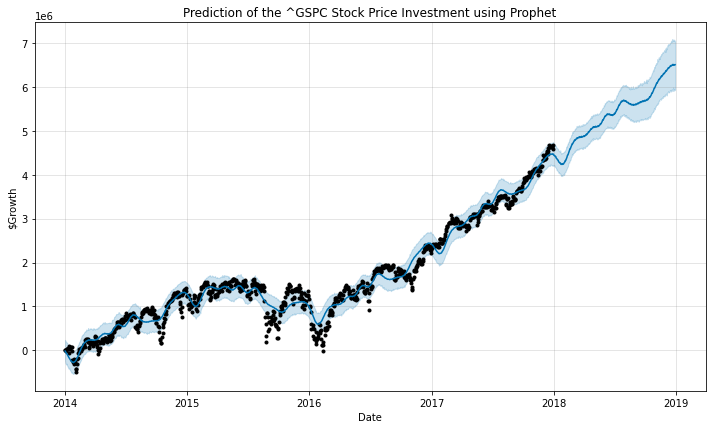

In [58]:
future1 = n.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction1 = n.predict(future1)
n.plot(prediction1)
plt.title("Prediction of the ^GSPC Stock Price Investment using Prophet")
plt.xlabel("Date")
plt.ylabel("$Growth")
plt.show()
# y axis is measured in $10. 1 = $1M, 2=$2M..., 7=$7M

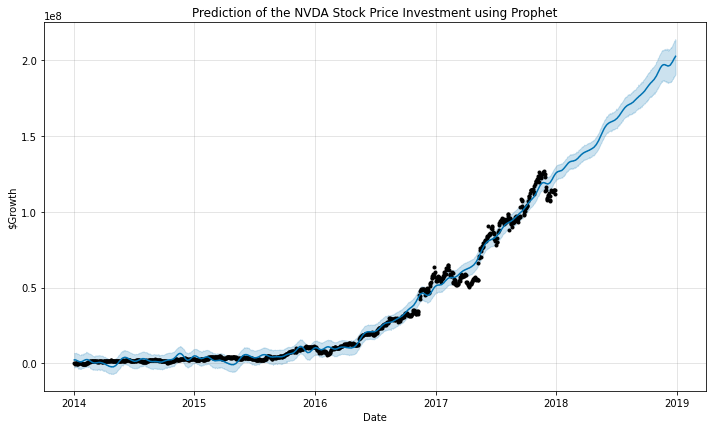

In [59]:
future2 = o.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction2 = o.predict(future2)
o.plot(prediction2)
plt.title("Prediction of the NVDA Stock Price Investment using Prophet")
plt.xlabel("Date")
plt.ylabel("$Growth")
plt.show()
# y axis is measured in $100M. 0.5 = $50M, 1 = $100M, 1.5=$150M, 2=$200M

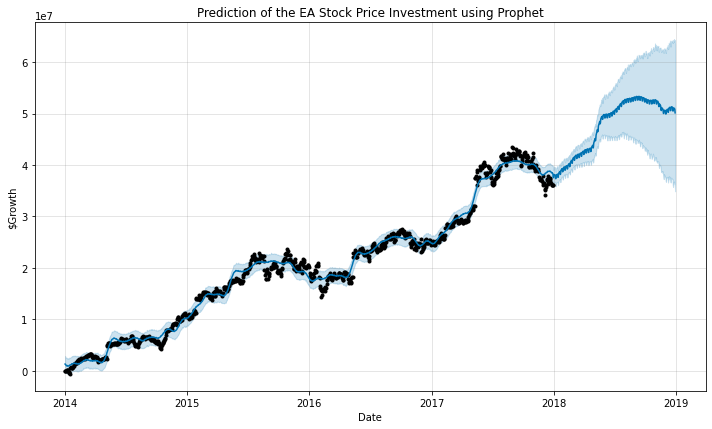

In [60]:
future3 = p.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction3 = p.predict(future3)
p.plot(prediction3)
plt.title("Prediction of the EA Stock Price Investment using Prophet")
plt.xlabel("Date")
plt.ylabel("$Growth")
plt.show()
# y axis is measured in $10. 1 = $10M, 2=$20M..., 6=$60M

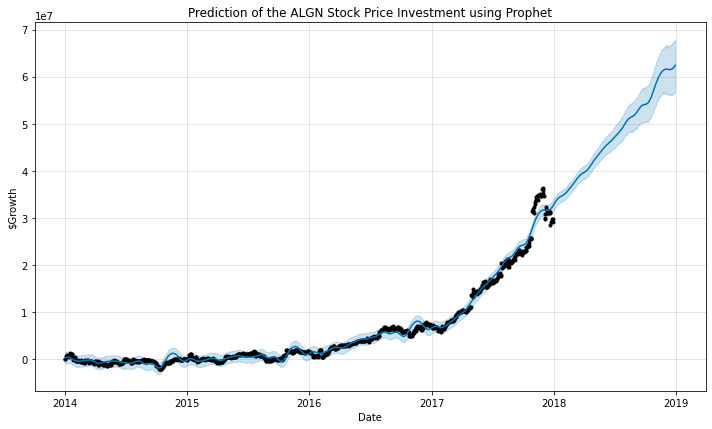

In [61]:
future4 = q.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction4 = q.predict(future4)
q.plot(prediction4)
plt.title("Prediction of the ALGN Stock Price Investment using Prophet")
plt.xlabel("Date")
plt.ylabel("$Growth")
plt.show()
# y axis is measured in $10. 1 = $10M, 2=$20M..., 6=$60M

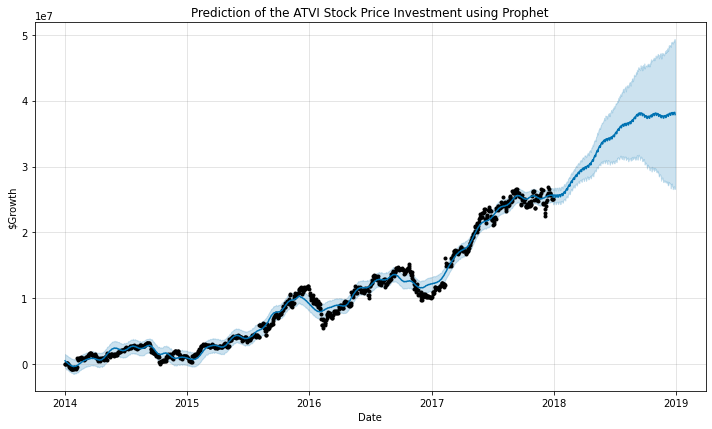

In [62]:
future5 = r.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction5 = r.predict(future5)
r.plot(prediction5)
plt.title("Prediction of the ATVI Stock Price Investment using Prophet")
plt.xlabel("Date")
plt.ylabel("$Growth")
plt.show()
# y axis is measured in $10. 1 = $10M, 2=$20M..., 6=$60M

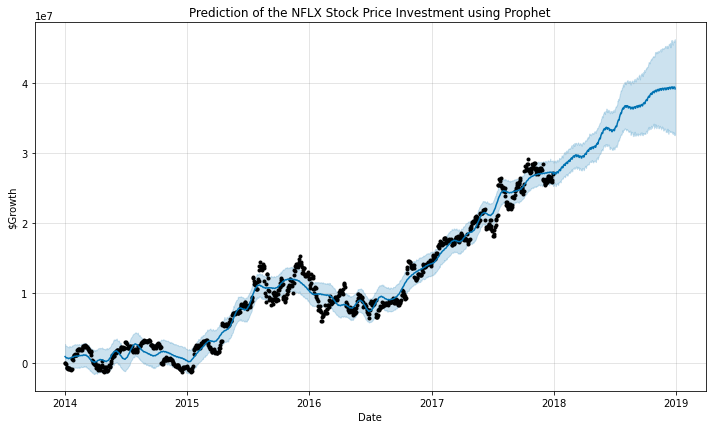

In [63]:
future6 = s.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction6 = s.predict(future6)
s.plot(prediction6)
plt.title("Prediction of the NFLX Stock Price Investment using Prophet")
plt.xlabel("Date")
plt.ylabel("$Growth")
plt.show()
# y axis is measured in $10. 1 = $10M, 2=$20M..., 6=$60M

# After all of the analyses, we can see that AVGO is forecasted to gain over 10M dollars at its lowest forecast while ^GSPC will gain about 1.5M dollars at its lowest forecast for 2018 based on the original 10M dollar investment growth from 2014. There are companies within the S&P 500 that can greatly outgain the S&P 500 based on the time-series forecasting of fbprophet package with numpy, pandas and matplotlib to help illustrate these performances. I would recommend investing in AVGO to hedge against NVDA's growth regressing to the mean due to it growing over 10X in value over a 3 year period.   

# Let's compare actual performance in 2018 of AVGO vs. ^GSPC & NVDA

In [64]:
avgo_actual_df = pd.read_csv("Downloads/Datasets/AVGO_2018_2019_Actual.csv")

gspc_actual_df = pd.read_csv("Downloads/Datasets/gspc_2018_2019_Actual.csv") 

nvda_actual_df = pd.read_csv("Downloads/Datasets/NVDA_Actual_2018.csv")

In [65]:
avgo_actual_df['Date'] = pd.to_datetime(avgo_actual_df['Date']) #converting date into proper datatype for manipulation in Python
avgo_actual_df = avgo_actual_df.set_index('Date') #setting date as index
avgo_actual_df.head() #checking data again to make sure 'Date' has been set as index

,Open,High,Low,Close,Adj Close,Volume,%Growth,$Growth
Date,,,,,,,,
2018-01-02,259.769989,267.500000,257.570007,267.010010,234.890182,3313500,0.000000,0.0000
2018-01-03,267.290009,270.730011,266.029999,269.929993,237.458969,3116100,0.010936,109358.5593
2018-01-04,271.589996,271.760010,268.429993,270.019989,237.538116,1906700,0.011273,112729.0696
2018-01-05,271.970001,274.260010,269.450012,271.619995,238.945618,2863300,0.017265,172652.1414
2018-01-08,270.920013,272.549988,269.059998,272.269989,239.517456,2097100,0.019700,196995.5733


In [66]:
gspc_actual_df['Date'] = pd.to_datetime(gspc_actual_df['Date']) #converting date into proper datatype for manipulation in Python
gspc_actual_df = gspc_actual_df.set_index('Date') #setting date as index
gspc_actual_df.head() #checking data again to make sure 'Date' has been set as index

,Open,High,Low,Close,Adj Close,Volume,%Growth,$Growth
Date,,,,,,,,
2018-01-02,2683.729980,2695.889893,2682.360107,2695.810059,2695.810059,3367250000,0.000000,0
2018-01-03,2697.850098,2714.370117,2697.770020,2713.060059,2713.060059,3538660000,0.006399,63988.18768
2018-01-04,2719.310059,2729.290039,2719.070068,2723.989990,2723.989990,3695260000,0.010453,104532.3312
2018-01-05,2731.330078,2743.449951,2727.919922,2743.149902,2743.149902,3236620000,0.017561,175605.2614
2018-01-08,2742.669922,2748.510010,2737.600098,2747.709961,2747.709961,3242650000,0.019252,192520.6185


In [67]:
nvda_actual_df['Date'] = pd.to_datetime(nvda_actual_df['Date']) #converting date into proper datatype for manipulation in Python
nvda_actual_df = nvda_actual_df.set_index('Date') #setting date as index
nvda_actual_df.head() #checking data again to make sure 'Date' has been set as index

,Open,High,Low,Close,Adj Close,Volume,%Growth,$Growth
Date,,,,,,,,
2018-01-02,195.779999,199.500000,194.500000,199.350006,197.695740,8890400,0.000000,0.000000e+00
2018-01-03,204.100006,213.699997,203.750000,212.470001,210.706848,22867600,0.065814,6.581387e+05
2018-01-04,215.759995,218.050003,212.690002,213.589996,211.817535,14581700,0.071432,7.143210e+05
2018-01-05,214.190002,216.910004,211.080002,215.399994,213.612518,14503100,0.080512,8.051160e+05
2018-01-08,220.399994,225.000000,218.580002,222.000000,220.157761,22030400,0.113619,1.136192e+06


<AxesSubplot:title={'center':'NVDA $ Forecasted Growth 2017-2018'}, xlabel='Date'>

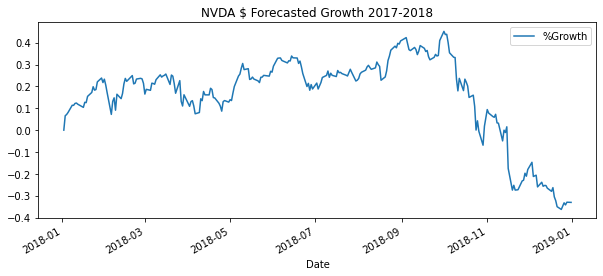

In [68]:
nvda_actual_df.plot(y='%Growth',legend=True, title='NVDA $ Forecasted Growth 2017-2018', figsize=(10,4))

In [69]:
avgo_actual_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', '%Growth',
       '$Growth'],
      dtype='object')

<AxesSubplot:title={'center':'AVGO $ Forecasted Growth 2017-2018'}, xlabel='Date'>

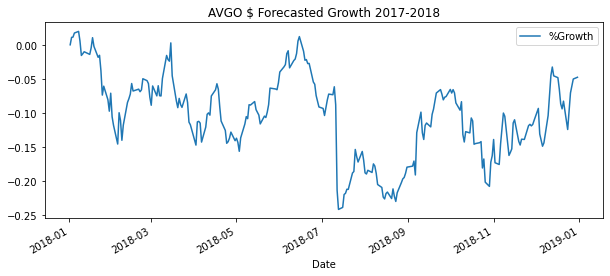

In [70]:
avgo_actual_df.plot(y='%Growth',legend=True, title='AVGO $ Forecasted Growth 2017-2018', figsize=(10,4))

<AxesSubplot:title={'center':'^GSPC $ Forecasted Growth 2017-2018'}, xlabel='Date'>

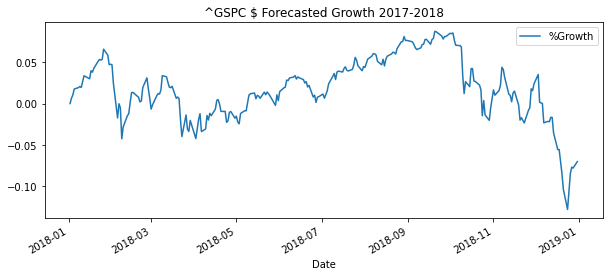

In [71]:
gspc_actual_df.plot(y='%Growth',legend=True, title='^GSPC $ Forecasted Growth 2017-2018', figsize=(10,4))

# INSIGHTS

# After plotting actual results for AVGO & ^GSPC, it can be seen that both stocks lost value by the end of 2019. Even NVDA, which outgained all the other companies by a significant margin, lost significant value from 2018-2019. It would have been better to invest in AVGO as opposed to the S&P 500 fund or NVDA but the best option  would have been to invest in another fund for 2018 or withold investment for 2018. This shows that while fbprophet is a great forecasting tool, it does not give results with 100% accuracy & cannot account for other market variables outside of the data. Using historical data will not predict future stock value without accounting for other variables. It is a great forecasting tool using historical data but cannot be used to predict future price with 100% certainty, especially when the forecasts extend from the short-term into the long-term. 